<a href="https://colab.research.google.com/github/Dhatrikowthavarapu/Machine-Learning/blob/main/classification%26Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fruit.txt")

# The shape of the data
print("The shape of the dataset is : ", df.shape)

# Preview of the first 5 rows of the data
df.head()

The shape of the dataset is :  (59, 1)


,fruit_label\tfruit_name\tfruit_subtype\tmass\twidth\theight\tcolor_score
0,1\tapple\tgranny_smith\t192\t8.4\t7.3\t0.55
1,1\tapple\tgranny_smith\t180\t8.0\t6.8\t0.59
2,1\tapple\tgranny_smith\t176\t7.4\t7.2\t0.60
3,2\tmandarin\tmandarin\t86 \t6.2\t4.7\t0.80
4,2\tmandarin\tmandarin\t84 \t6.0\t4.6\t0.79


In [ ]:
# Checking the number of unique values in each column

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
fruit_label\tfruit_name\tfruit_subtype\tmass\twidth\theight\tcolor_score,59


In [ ]:
# Separating the columns in categorical and continuous

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [ ]:
# Summary statistics

df[con_cols].describe().transpose()

KeyError: ignored

In [ ]:
# Missing values

df.isnull().sum()

fruit_label\tfruit_name\tfruit_subtype\tmass\twidth\theight\tcolor_score    0
dtype: int64

Exploratory Data Analysis

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

In [ ]:
# Scaling and Encoding features

# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

KeyError: ignored

In [ ]:
# Dimensionality Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=22)
X = pca.fit_transform(X)

In [ ]:
# Train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is: ",X_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of X_train is:  (242, 22)
The shape of X_test is:  (61, 22)
The shape of y_train is:  (242, 1)
The shape of y_test is:  (61, 1)


**Logistic Regression**

In [ ]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

The test accuracy score of SVM is  0.8688524590163934
Classification Report: 
               precision    recall  f1-score   support

           0     0.8387    0.8966    0.8667        29
           1     0.9000    0.8438    0.8710        32

    accuracy                         0.8689        61
   macro avg     0.8694    0.8702    0.8688        61
weighted avg     0.8709    0.8689    0.8689        61



Iter 0: cost: 0.9630790900890911
Iter 10000: cost: 0.35207908092552
Iter 20000: cost: 0.32434715031270844
Iter 30000: cost: 0.3118760781960616
Iter 40000: cost: 0.3047201733044162
Iter 50000: cost: 0.3002186873198842
Iter 60000: cost: 0.29722314401132116
Iter 70000: cost: 0.2951435180224018
Iter 80000: cost: 0.2936488361564284
Iter 90000: cost: 0.29254233444797684


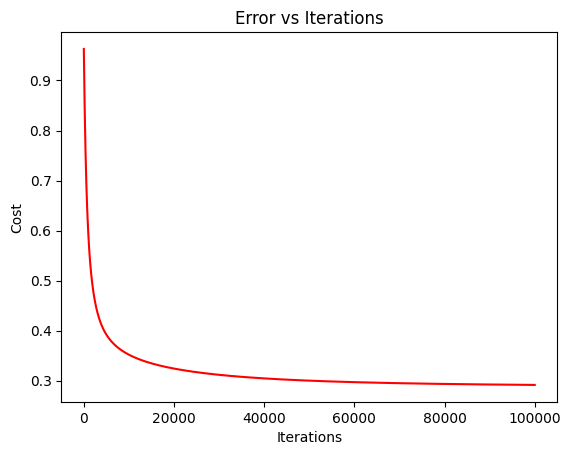

The test accuracy score of Logistric Regression is  0.9016393442622951
Classification Report: 
               precision    recall  f1-score   support

           0     0.8966    0.8966    0.8966        29
           1     0.9062    0.9062    0.9062        32

    accuracy                         0.9016        61
   macro avg     0.9014    0.9014    0.9014        61
weighted avg     0.9016    0.9016    0.9016        61



NameError: ignored

In [ ]:
# define logistic regression impl method

class LogisticRegression:

    def __init__(self, alpha=0.01, iters=1000, verbose = False):
        self.alpha = alpha
        self.iters = iters
        self.theta = None
        self.verbose = verbose

    # Logistic Function
    def sigmoid(self, z):
        return  1 / (1 + np.exp(-z))

    # Cost Function
    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    #Gradient Computation
    def gradient(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]

    # Parameter Update
    def update_theta(self, gradient, lr):
        return self.theta - (gradient * self.alpha)

    def fit(self, X, y):
        # Initial theta values
        np.random.seed(999)
        self.theta = np.random.randn(X.shape[1])
        cost_array = np.zeros(self.iters)

        for i in range(self.iters):
            h = self.sigmoid(np.dot(X, self.theta))
            cost_num = self.cost(h, y)
            cost_array[i] = cost_num
            gradient = self.gradient(X, h, y)
            self.theta = self.update_theta(gradient, self.alpha)

            # Print training History
            if(self.verbose):
                if(self.iters<=1000):
                    if(i%100==0):
                        print(f"Iter {i}: cost: {cost_array[i]}")
                elif(self.iters<=10000 and self.iters>1000):
                    if(i%1000==0):
                        print(f"Iter {i}: cost: {cost_array[i]}")
                else:
                    if(i%10000==0):
                        print(f"Iter {i}: cost: {cost_array[i]}")

        return cost_array

    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.theta))
        preds = np.where(h>=0.5, 1, 0)
        return np.array(preds)

    def predict_proba(self, X):
        h = self.sigmoid(np.dot(X, self.theta))
        return np.array(h)

    def plotChart(self, cost_num):
        fig, ax = plt.subplots()
        ax.plot(np.arange(self.iters), cost_num, 'r')
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost')
        ax.set_title('Error vs Iterations')
        plt.show()

# hyper params
lr = 0.005
iters = 100000

log_reg = LogisticRegression(lr, iters, True)
costs = log_reg.fit(X_train, y_train.values.reshape(242,))
log_reg.plotChart(costs)
y_pred = log_reg.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

**FRUIT CLASSIFICATION**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_table('/content/drive/MyDrive/heart.csv')

In [ ]:
df.sample(10)

,"age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output"
269,"56,1,0,130,283,1,0,103,1,1.6,0,0,3,0"
201,"60,1,0,125,258,0,0,141,1,2.8,1,1,3,0"
298,"57,0,0,140,241,0,1,123,1,0.2,1,0,3,0"
172,"58,1,1,120,284,0,0,160,0,1.8,1,0,2,0"
173,"58,1,2,132,224,0,0,173,0,3.2,2,2,3,0"
219,"48,1,0,130,256,1,0,150,1,0,2,2,3,0"
300,"68,1,0,144,193,1,1,141,0,3.4,1,2,3,0"
274,"47,1,0,110,275,0,0,118,1,1,1,1,2,0"
181,"65,0,0,150,225,0,0,114,0,1,1,3,3,0"
255,"45,1,0,142,309,0,0,147,1,0,1,3,3,0"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output  303 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [ ]:
X = df.iloc[:,3:6].values
y = df.iloc[:,-1].values
print('Total Features are', X.shape)
print('Total Labels are',y.shape)

Total Features are (303, 0)
Total Labels are (303,)


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
log_reg = LogisticRegression()
costs = log_reg.fit(X_train, y_train.reshape(242,))

ValueError: ignored

In [ ]:
y_pred=model.predict(X_test)

ValueError: ignored

In [ ]:
print('Actual',"--","Predicted")
for i in range(len(y_pred)):
    print(y_test[i],"--",y_pred[i])

Actual -- Predicted
orange -- orange
mandarin -- mandarin
orange -- apple
orange -- orange
apple -- apple
apple -- apple
lemon -- lemon
apple -- apple
apple -- apple
orange -- orange
orange -- lemon
orange -- apple


In [ ]:
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  75.0

***Confusion Matrix***
 [[4 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [2 1 0 3]]

***Classification report***
               precision    recall  f1-score   support

       apple       0.67      1.00      0.80         4
       lemon       0.50      1.00      0.67         1
    mandarin       1.00      1.00      1.00         1
      orange       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.79      0.88      0.78        12
weighted avg       0.85      0.75      0.74        12



**KNN**

In [ ]:
#import KNClassifier
from sklearn.neighbors import KNeighborsClassifier

#Create an Instance for KN Classifier
neigh = KNeighborsClassifier(n_neighbors=3)

# Perform Training
model = neigh.fit(X_train, y_train)

ValueError: ignored

In [ ]:
print('Actual',"--","Predicted")
for i in range(len(y_pred)):
    print(y_test[i],"--",y_pred[i])

Actual -- Predicted
orange -- orange
mandarin -- mandarin
orange -- apple
orange -- orange
apple -- apple
apple -- apple
lemon -- lemon
apple -- apple
apple -- apple
orange -- orange
orange -- lemon
orange -- apple


In [ ]:
#making predictions
y_pred=model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  75.0

***Confusion Matrix***
 [[4 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 2 0 3]]

***Classification report***
               precision    recall  f1-score   support

       apple       0.80      1.00      0.89         4
       lemon       0.33      1.00      0.50         1
    mandarin       1.00      1.00      1.00         1
      orange       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.78      0.88      0.76        12
weighted avg       0.88      0.75      0.75        12



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Model
decision_tree = DecisionTreeClassifier(criterion='gini')
# Perform the training
model = decision_tree.fit(X_train, y_train)

In [ ]:
#making predictions
y_pred=model.predict(X_test)

In [ ]:
print('Actual',"--","Predicted")
print("------------------------")
for i in range(len(y_pred)):
    print(y_test[i],"--",y_pred[i])

Actual -- Predicted
------------------------
orange -- orange
mandarin -- mandarin
orange -- orange
orange -- orange
apple -- apple
apple -- orange
lemon -- lemon
apple -- apple
apple -- apple
orange -- orange
orange -- orange
orange -- orange


In [ ]:
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  91.66666666666666

***Confusion Matrix***
 [[3 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 6]]

***Classification report***
               precision    recall  f1-score   support

       apple       1.00      0.75      0.86         4
       lemon       1.00      1.00      1.00         1
    mandarin       1.00      1.00      1.00         1
      orange       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.96      0.94      0.95        12
weighted avg       0.93      0.92      0.91        12



SVM - Linear

In [ ]:
#import SVM Classifier
from sklearn.svm import SVC

#Create an Instance for KN Classifier
svm_l = SVC(kernel = 'linear')
# Perform Training
model = svm_l.fit(X_train, y_train)
#making predictions
y_pred=model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  83.33333333333334

***Confusion Matrix***
 [[3 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 5]]

***Classification report***
               precision    recall  f1-score   support

       apple       1.00      0.75      0.86         4
       lemon       0.50      1.00      0.67         1
    mandarin       1.00      1.00      1.00         1
      orange       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.90      0.84        12
weighted avg       0.88      0.83      0.84        12



SVM - RBF

In [ ]:
#import SVM Classifier
from sklearn.svm import SVC

#Create an Instance for KN Classifier
svm_r = SVC(kernel = 'rbf')
# Perform Training
model = svm_r.fit(X_train, y_train)
#making predictions
y_pred=model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  41.66666666666667

***Confusion Matrix***
 [[4 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [4 1 0 1]]

***Classification report***
               precision    recall  f1-score   support

       apple       0.44      1.00      0.62         4
       lemon       0.00      0.00      0.00         1
    mandarin       0.00      0.00      0.00         1
      orange       1.00      0.17      0.29         6

    accuracy                           0.42        12
   macro avg       0.36      0.29      0.23        12
weighted avg       0.65      0.42      0.35        12



SVM - Poly

In [ ]:
#import SVM Classifier
from sklearn.svm import SVC

#Create an Instance for KN Classifier
svm_p = SVC(kernel = 'poly',degree=2)
# Perform Training
model = svm_p.fit(X_train, y_train)
#making predictions
y_pred=model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

print("\n***Confusion Matrix***\n",confusion_matrix(y_test, y_pred))

print("\n***Classification report***\n",classification_report(y_test, y_pred))

Accuracy:  41.66666666666667

***Confusion Matrix***
 [[4 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [3 2 0 1]]

***Classification report***
               precision    recall  f1-score   support

       apple       0.50      1.00      0.67         4
       lemon       0.00      0.00      0.00         1
    mandarin       0.00      0.00      0.00         1
      orange       1.00      0.17      0.29         6

    accuracy                           0.42        12
   macro avg       0.38      0.29      0.24        12
weighted avg       0.67      0.42      0.37        12

